### Unsupervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [2]:
dataset= pd.read_csv(r'C:/Users/Shambhavi/Downloads/datasets/cricket_data - Sheet1.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
Player     13 non-null object
Runs       13 non-null int64
Wickets    13 non-null int64
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [5]:
dataset.shape

(13, 3)

In [6]:
dataset.head()

,Player,Runs,Wickets
0,Sachin Tendulkar,18426,192
1,Kripal Singh,12458,0
2,Fakhar Zaman,9840,421
3,Aavishkar Salvi,3467,480
4,Abbas Ali,4877,512


[[18426   192]
 [12458     0]
 [ 9840   421]
 [ 3467   480]
 [ 4877   512]
 [10405    12]
 [ 3287   575]
 [ 2145   437]
 [ 4562   502]
 [ 2543   381]
 [10151    14]
 [10889     0]
 [11579   142]]


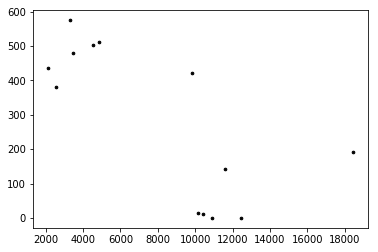

In [9]:
f1=dataset['Runs'].values
f2=dataset['Wickets'].values
x=np.array(list(zip(f1,f2)))
print(x)
plt.scatter(f1,f2,c='black',s=7)

In [11]:
from sklearn.cluster import KMeans
#number of cluster 
kmeans=KMeans(n_clusters=3)

#fitting the input data
kmeans=kmeans.fit(x)

# getting the cluster labels
labels=kmeans.predict(x)

#centriods values
centriods=kmeans.cluster_centers_

In [12]:
print(labels)

[2 1 1 0 0 1 0 0 0 0 1 1 1]


In [13]:
print(centriods)

[[ 3480.16666667   481.16666667]
 [10887.            98.16666667]
 [18426.           192.        ]]


In [15]:
pd.DataFrame({"player":dataset['Player'],"runs":dataset['Runs'],"wickets":dataset['Wickets'],"label":labels})

,label,player,runs,wickets
0,2,Sachin Tendulkar,18426,192
1,1,Kripal Singh,12458,0
2,1,Fakhar Zaman,9840,421
3,0,Aavishkar Salvi,3467,480
4,0,Abbas Ali,4877,512
5,1,Brian Lara,10405,12
6,0,James Anderson,3287,575
7,0,Dale Steyn,2145,437
8,0,Wasim Akram,4562,502
9,0,Glenn McGrath,2543,381


### Principal Component Analysis

In [20]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
from sklearn.preprocessing import StandardScaler
features=["sepal length","sepal width","petal length","petal width"]
x=df.loc[:,features].values
y=df.loc[:,['target']].values
x=StandardScaler().fit_transform(x)


In [24]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])

In [25]:
finalDf=pd.concat([principalDf,df[['target']]],axis=1)

In [27]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])